In [2]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from pandas import DataFrame, Series

# Enable inline plotting
%matplotlib inline

In [3]:
# Next, create the series objects for our dataset.
cities = (["Los Angeles", "Phoenix", "San Diego", "San Francisco", "Seattle"])

ak = Series(['Alaska'] * len(cities), index = cities)
aw = Series(['AM West'] * len(cities), index = cities)

ak_ot = Series([497, 221, 212, 503, 1841], index = cities)
ak_dl = Series([62, 12, 20, 102, 305], index = cities)
aw_ot = Series([694, 4840, 383, 320, 201], index = cities)
aw_dl = Series([117, 415, 65, 129, 61], index = cities)

In [3]:
# Create the dataframe for export to CSV
df = pd.DataFrame(
    {
     'Alaska On Time': ak_ot,
     'Alaska Delayed': ak_dl,
     'AM West On Time': aw_ot,
     'AM West Delayed': aw_dl},
    index=cities)
df

,AM West Delayed,AM West On Time,Alaska Delayed,Alaska On Time
Los Angeles,117,694,62,497
Phoenix,415,4840,12,221
San Diego,65,383,20,212
San Francisco,129,320,102,503
Seattle,61,201,305,1841


In [4]:
# Create a CSV file version of the dataframe
df.to_csv('flightinfo.txt',index=True,header=False)

#Read the CSV file
Location = r'D:\Projects\Educational\IS362\project-1\flightinfo.txt'
df_csv = pd.read_csv(Location, names=['AM West Delayed', 'AM West On Time', 'Alaska Delayed', 'Alaska On Time'])

In [5]:
#Add total flights for each airline
am_tot = df_csv['AM West Delayed'] + df_csv['AM West On Time']
ak_tot = df_csv['Alaska Delayed'] + df_csv['Alaska On Time']

In [6]:
# Calculate percentage of flights delayed and on time.
am_pct_ot = Series(df_csv['AM West On Time'] / am_tot * 100)
am_pct_dl = Series(df_csv['AM West Delayed'] / am_tot * 100)
ak_pct_ot = Series(df_csv['Alaska On Time'] / ak_tot * 100)
ak_pct_dl = Series(df_csv['Alaska Delayed'] / ak_tot * 100)

In [7]:
# Insert each new Series object in to the DataFrame
df_csv.insert(2, 'AM West Percent On Time', am_pct_ot)
df_csv.insert(3, 'AM West Percent Delayed', am_pct_dl)
df_csv.insert(6, 'Alaska Percent On Time', ak_pct_ot)
df_csv.insert(7, 'Alaska Percent Delayed', ak_pct_dl)
df_csv

,AM West Delayed,AM West On Time,AM West Percent On Time,AM West Percent Delayed,Alaska Delayed,Alaska On Time,Alaska Percent On Time,Alaska Percent Delayed
Los Angeles,117,694,85.573366,14.426634,62,497,88.908766,11.091234
Phoenix,415,4840,92.102759,7.897241,12,221,94.849785,5.150215
San Diego,65,383,85.491071,14.508929,20,212,91.379310,8.620690
San Francisco,129,320,71.269488,28.730512,102,503,83.140496,16.859504
Seattle,61,201,76.717557,23.282443,305,1841,85.787512,14.212488


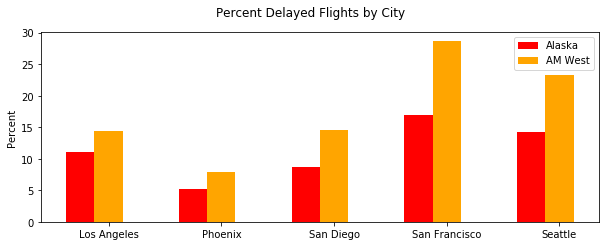

In [59]:
# Plot the percentage delayed flights by city
ak_dl = df_csv['Alaska Percent Delayed']
aw_dl = df_csv['AM West Percent Delayed']
labels = [x for x in list('Cities')]
fig, ax = plot.subplots(figsize=(10, 3.5))
width = 0.25 # bar width
xlocs = np.arange(len(ak_dl))
ax.bar(xlocs-width, ak_dl, width,
 color='red', label='Alaska')
ax.bar(xlocs, aw_dl, width,
 color='orange', label='AM West')
ax.set_xticks(ticks=range(len(before)))
ax.set_xticklabels(cities)
ax.legend(loc='best')
ax.set_ylabel('Percent')
fig.suptitle('Percent Delayed Flights by City')

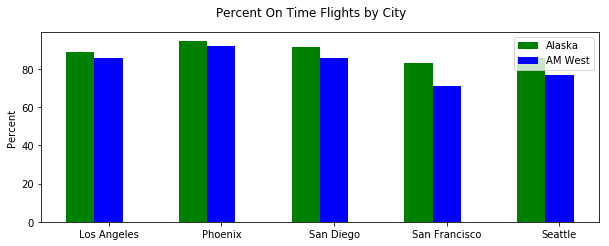

In [62]:
# Plot the percentage on time flights by city
ak_ot = df_csv['Alaska Percent On Time']
aw_ot = df_csv['AM West Percent On Time']
labels = [x for x in list('Cities')]
fig, ax = plot.subplots(figsize=(10, 3.5))
width = 0.25 # bar width
xlocs = np.arange(len(ak_ot))
ax.bar(xlocs-width, ak_ot, width,
 color='green', label='Alaska')
ax.bar(xlocs, aw_ot, width,
 color='blue', label='AM West')
ax.set_xticks(ticks=range(len(before)))
ax.set_xticklabels(cities)
ax.legend(loc='best')
ax.set_ylabel('Percent')
fig.suptitle('Percent On Time Flights by City')